# Wine Analysis - Uncovering the Hidden Profiles in Wine Data

**Objective:**

Explore the provided wine dataset to uncover interesting patterns, profiles, or correlations among the different chemical constituents of the wines. The challenge is open-ended, encouraging creative and exploratory analysis.

**Task Decription:**
- Data Exploration: Perform an initial exploration of the dataset to understand the distribution and relationship of various attributes like Alcohol, Malic Acid, Flavanoids, etc. Use visual tools and statistical techniques for a comprehensive analysis.
- Clustering Analysis: Apply clustering techniques (e.g., K-Means, Hierarchical Clustering, DBSCAN) to group the wines based on their chemical properties. Determine the optimal number of clusters and justify your choice. Analyze the characteristics of each cluster. What does each cluster represent in terms of wine properties?
- Creative Insigths and Storytelling: Beyond the technical analysis, craft a narrative around your findings. What interesting stories do the data tell about the wines? Are there any unexpected correlations or findings that could be of interest to wine makers or enthusiasts?
- Presentation: The task must be presented in a Github repository where all the code and documentation should be. Extra points for the good use of this tool

**Optional tasks:**
- Containerization and Data Rerieval:
  - Containerize the Analysis: Dockerize the entire analysis pipeline. This includes creating a Dockerfile and necessary configurations to build a Docker image that can run the analysis. Separately from the python notebook where you documented your findings, you could create a dockerfile that executes the code fluidly and print some findings
  - API Data Retrieval: Enhance the task by adding a component where the wine dataset is retrieved via an API call from the link provided. This could involve setting up a simple API (using Flask or FastAPI) that serves the dataset, which the Docker container can then access to perform the analysis.
- Provide documentation: on how to set up and run the Docker container, and how to access the data through the API. (A readme will suffice)

**Evaluation criteria:**
- Depth and Creativity in data exploration and clustering analysis.
- Technical Proficiency in applying data analysis and clustering techniques.
- Quality of Insights: Uniqueness and depth of the insights and stories derived from the data.
- Optional Task: Success in containerizing the analysis and setting up data retrieval via an API, along with clear documentation.




## Dataset

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The attributes are:
- Alcohol
- Malic acid : Malic Acid is one of the main acids found in the acidity of grapes. Its concentration decreases the more a grape ripens (madura). Malic Acid provides a strong link to wines tasting 'flat' if there is not enough. If there is too much the wine will taste 'sour'. Mientras mas madura la uva, menos acida y menos agrio.
- Ash: The ash content is defined to be all those products remaining after igniting the residue left after the evaporation of the wine. Ash content into wine lie normally between 1,3 and 3,5 mg/l and is strongly influenced by water balance of vine. All relevant substances are absorbed during grape ripeness through the soil, whereby minerals are the biggest part of ash. Ash content increases as fermetation perdiod increases.
- Alcalinity of ash: It is a measure of weak alkalinity dissolved in water.
- Magnesium:  It is an essential element of the human body, which can promote energy metabolism and is weakly alkaline.
- Total phenols: molecules containing polyphenolic substances, which have a bitter taste and affect the taste, color and taste of the wine, and belong to the nutrients in the wine.
- Flavanoids: Flavanoids: It is a beneficial antioxidant for the heart and anti-aging, rich in aroma and bitter
- Nonflavanoid phenols: : It is a special aromatic gas with oxidation resistance and is weakly acidic.
- Proanthocyanins: It is a bioflavonoid compound, which is also a natural antioxidant with a slight bitter smell.
- Color intensity:  refers to the degree of color shade. It is used to measure the style of wine to be “light” or “thick”. The color intensity is high, meanwhile the longer the wine and grape juice are in contact during the wine making process, the thicker the taste.
- Hue: refers to the vividness of the color and the degree of warmth and coldness. It can be used to measure the variety and age of the wine. Red wines with higher ages will have a yellow hue and increased transparency. Color intensity and hue are important indicators for evaluating the quality of a wine's appearance. 
- OD280/OD315 of diluted wines: This is a method for determining the protein concentration, which can determine the protein content of various wines
- Proline: It is the main amino acid in red wine and an important part of the nutrition and flavor of wine. 


## Data cleaning and preprocessing

In [43]:
import pandas as pd;
import math

In [2]:
#Loading downloaded data
#Dataset link: https://storage.googleapis.com/the_public_bucket/wine-clustering.csv
wine_raw = pd.read_csv('../data/wine_raw.csv')

In [3]:
wine_raw.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Data cleaning and preprocessing

#### Missing Values

We perform a quick check for missing values.

In [126]:
wine_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


We can see there are no missing values and the data types are correct for each column.

#### Outliers

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

In [406]:
def plot_boxplots(df):
    sns.set(rc={'font.family': 'sans-serif', 'font.sans-serif': ['DejaVu Sans']})
    nrows = math.ceil(len(df.columns)/3)
    ncols = min(len(df.columns),3)
    plt.figure(figsize=(ncols*4,nrows*2))

    plt.suptitle("\nWine Features Boxplot", fontsize=14)
    for i,col in enumerate(df.columns):
        plt.subplot(nrows,ncols,i+1);
        sns.boxplot(x=df[col],color='purple')
        plt.xlabel(col, fontsize=10)

    plt.tight_layout()
    plt.show();

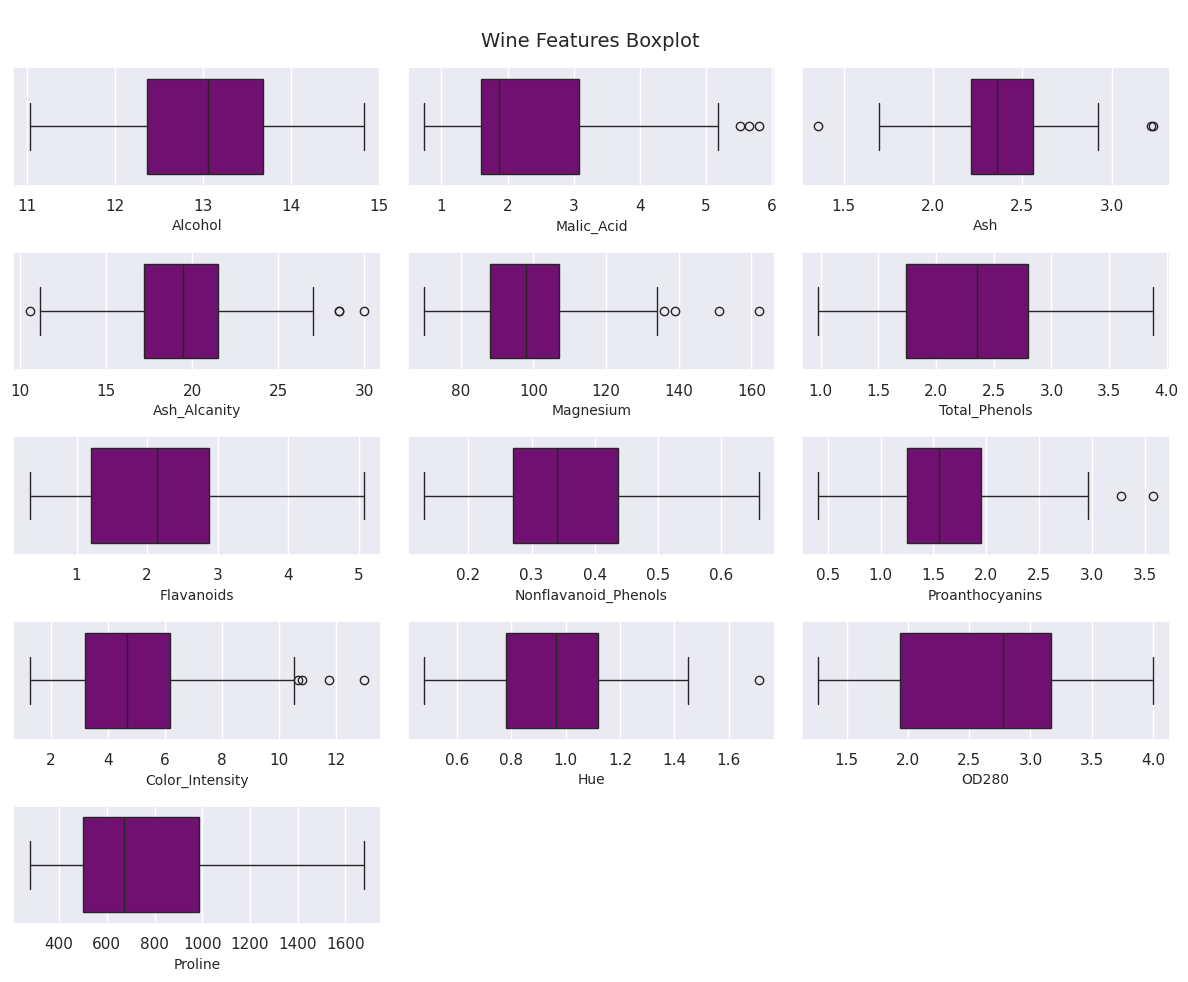

In [407]:
plot_boxplots(wine_raw)


We can see that there are some outliers. This has to be considered while selecting the scaling method for the features, one approach is selecting a Robust Scaler.

In [130]:
def remove_outliers_iqr(df, columns=None):
    """
    Remove outliers from a DataFrame based on the Interquartile Range (IQR).

    Parameters:
    - df (pd.DataFrame): Input DataFrame.
    - columns (list): List of columns to consider. If None, all numeric columns will be considered.

    Returns:
    - pd.DataFrame: DataFrame without outliers.
    """

    if columns is None:
        columns = df.select_dtypes(include='number').columns.tolist()

    filtered_df = df.copy()

    for column in columns:
        # Calculate quartiles
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        # Calculate IQR
        IQR = Q3 - Q1

        # Define upper and lower bounds to identify outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        filtered_df = filtered_df[(filtered_df[column] >= lower_bound) & (filtered_df[column] <= upper_bound)]

    return filtered_df

In [258]:
wine_cleaned = remove_outliers_iqr(wine_raw)

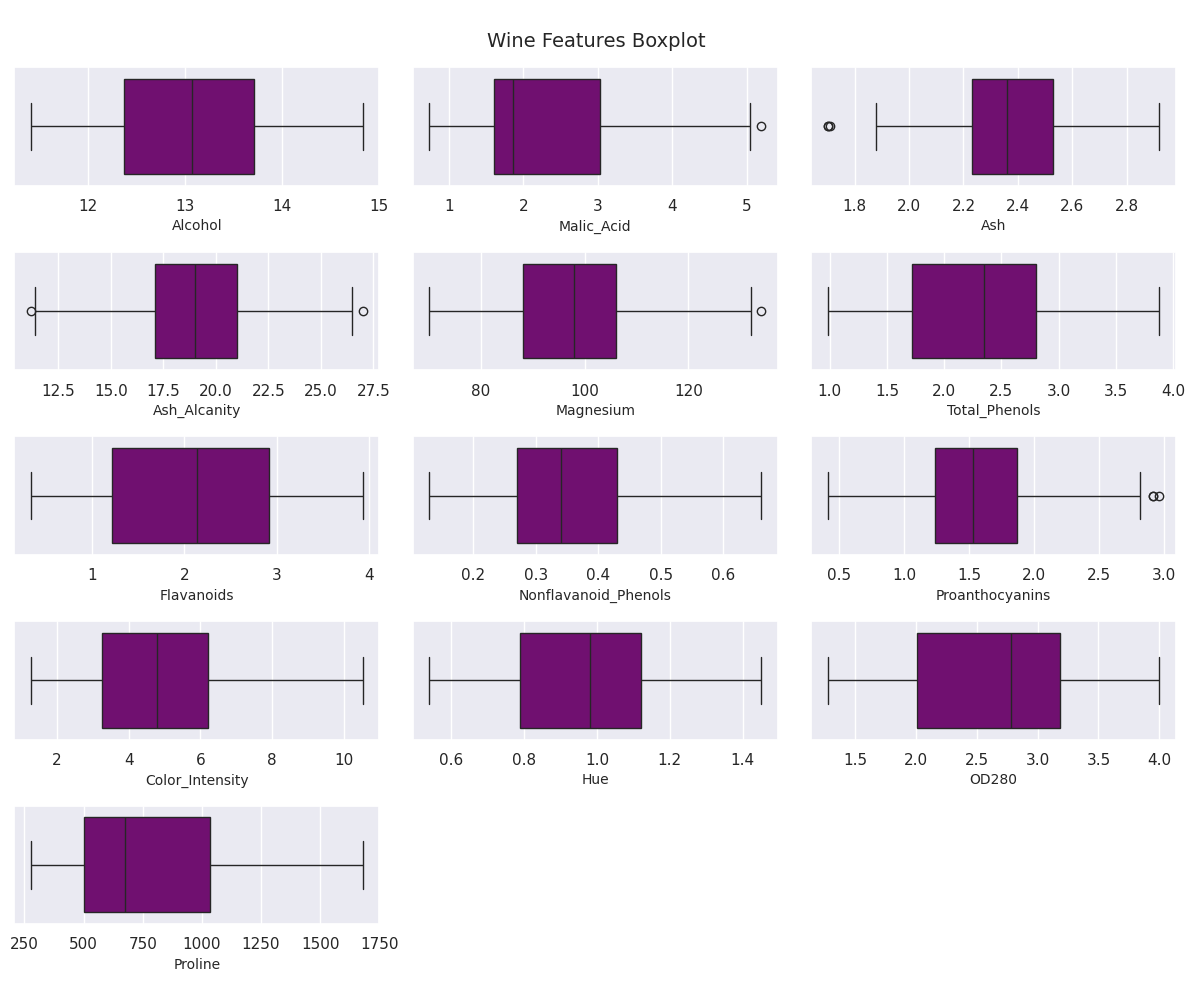

In [408]:
plot_boxplots(wine_cleaned)

## Exploratory Data Analysis (EDA) - Data Exploration task

Data is visualized and analyzed to gain an initial understanding. In this stage we use descriptive statistics, data visualization libraries, and tools to help uncover patterns, relationships, and potential insights.

Perform an initial exploration of the dataset to understand the distribution and relationship of various attributes like Alcohol, Malic Acid, Flavanoids, etc.
Use visual tools and statistical techniques for a comprehensive analysis.


#### Descriptive Statistics

In [260]:
wine_cleaned.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,13.040373,2.306832,2.363292,19.232298,98.534161,2.290373,2.043789,0.358137,1.548075,5.014161,0.959106,2.628820,759.111801
std,0.797841,1.048263,0.241205,3.014706,12.365290,0.632366,0.985649,0.121810,0.525859,2.117379,0.218049,0.709052,323.866465
min,11.410000,0.740000,1.700000,11.200000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.540000,1.270000,278.000000
25%,12.370000,1.610000,2.230000,17.100000,88.000000,1.720000,1.220000,0.270000,1.240000,3.270000,0.790000,2.010000,502.000000
50%,13.070000,1.860000,2.360000,19.000000,98.000000,2.350000,2.140000,0.340000,1.530000,4.800000,0.980000,2.780000,675.000000
75%,13.710000,3.030000,2.530000,21.000000,106.000000,2.800000,2.910000,0.430000,1.870000,6.200000,1.120000,3.180000,1035.000000
max,14.830000,5.190000,2.920000,27.000000,134.000000,3.880000,3.930000,0.660000,2.960000,10.520000,1.450000,4.000000,1680.000000


In [401]:
def plot_distplots(df):
    """
    Plot distplots for all wine DataFrame columns

    Parameters:
    - df(pd.DataFrame): Input DataFrame

    Returns:
    - None
    """
    sns.set(rc={'font.family': 'sans-serif', 'font.sans-serif': ['DejaVu Sans']})
    nrow=max(math.ceil(len(df.columns)/3),1)
    ncols = min(len(df.columns),3)
    fig, axes = plt.subplots(nrows=nrow, ncols=3, figsize=(ncols*5,nrow*2.5))
    plt.suptitle("\nWine Features Distplot\n", fontsize=20)

    axes=axes.flatten()
    n_to_remove = 3-round(round((len(df.columns)/3)%1,2)*3)
    for i in range(1,n_to_remove+1):
        axes[-i].remove()

    for index, col in enumerate(df.columns):
        sns.distplot(x=df[col],ax=axes[index], bins=40,color='blue')
        axes[index].set_xlabel(f'{col}')

    plt.tight_layout()
    plt.show();
    return None

/tmp/ipykernel_110713/3786010758.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[col],ax=axes[index], bins=40,color='blue')
/tmp/ipykernel_110713/3786010758.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[col],ax=axes[index], bins=40,color='blue')
/tmp/ipykernel_110713/378601

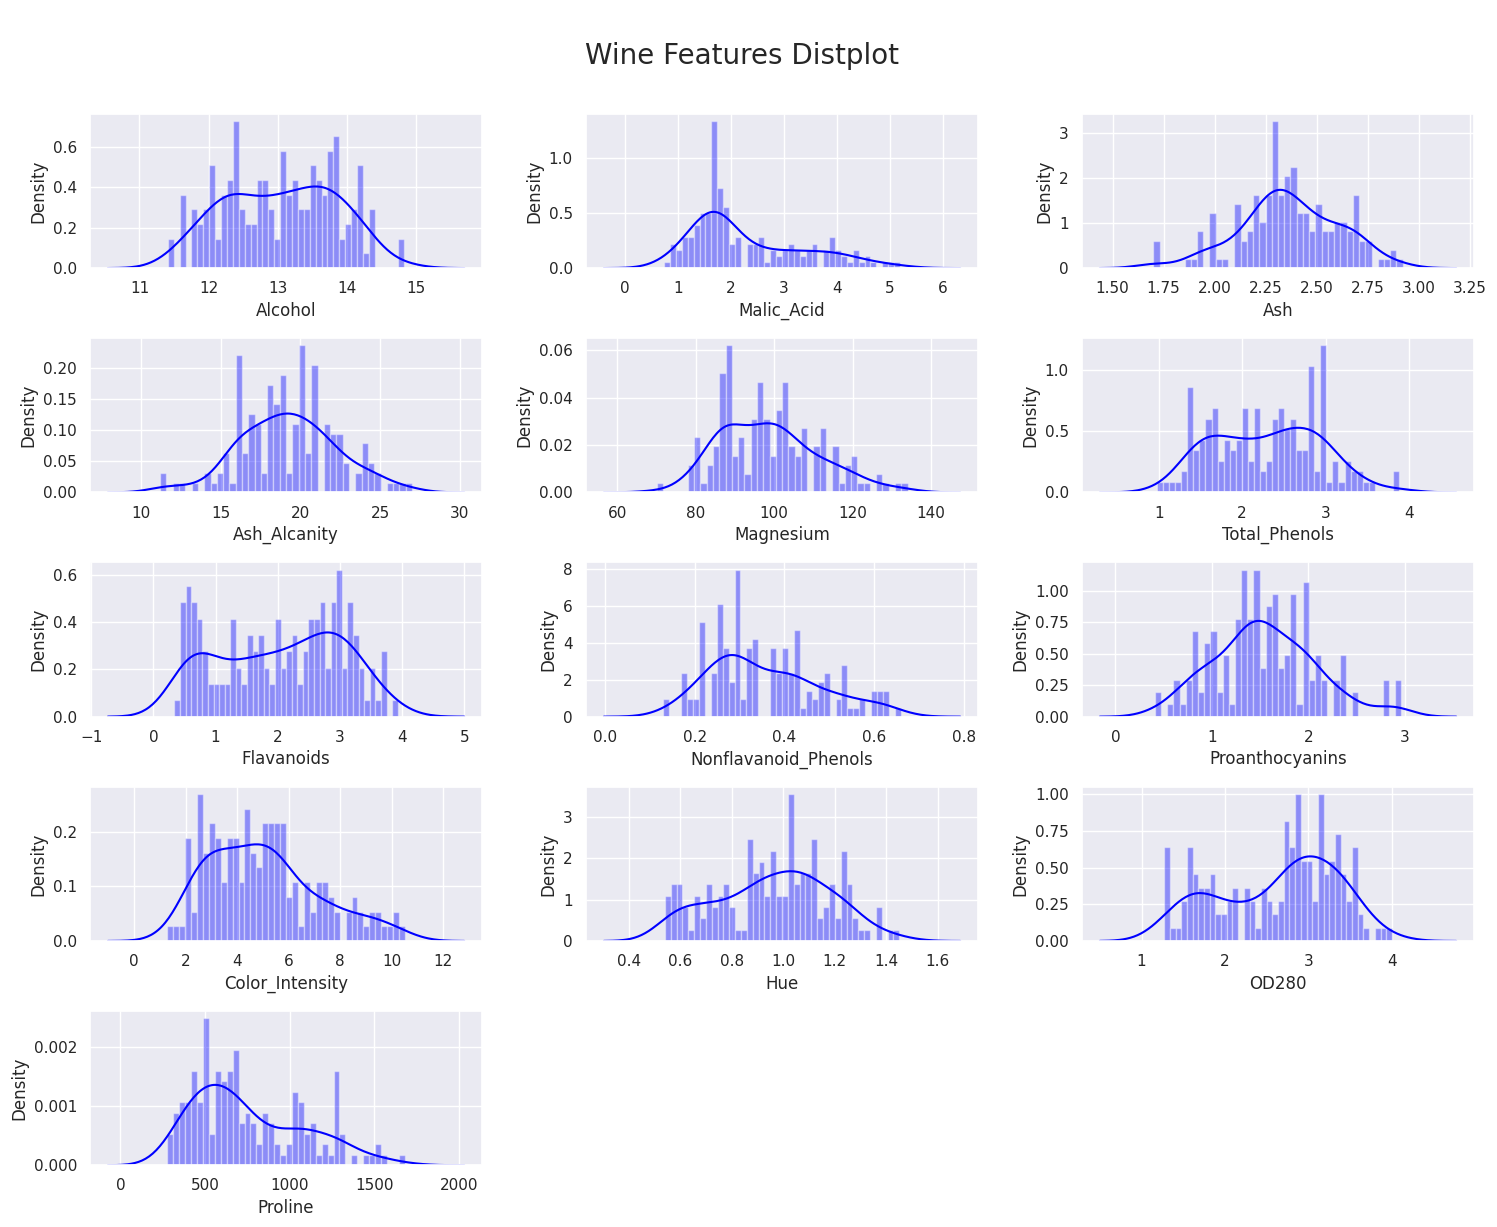

In [402]:
plot_distplots(wine_cleaned)

In [397]:
def plot_correlations(df_cleaned):
    """
    Plot correlation matrix for Wine DataFrame

    Parameters:
    - df_cleaned(pd.DataFrame): Input DataFrame

    Returns:
    - Correlation Matrix
    """
    sns.set(rc={'font.family': 'sans-serif', 'font.sans-serif': ['DejaVu Sans']})
    correlation_matrix = df_cleaned.corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=.5)

    # Customize the plot
    plt.title('\nCorrelation Heatmap', fontsize=20, pad=20)
    plt.show()
    return correlation_matrix

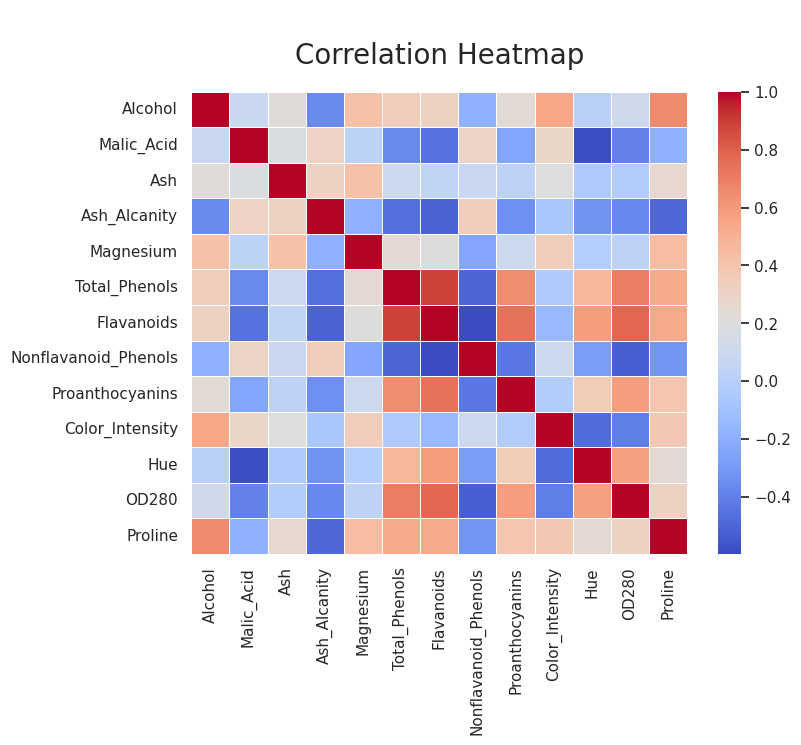

In [398]:
correlation_matrix = plot_correlations(wine_cleaned)

In [393]:
def plot_correlated_scatters(df,lower_bound, upper_bound):
    sns.set(rc={'font.family': 'sans-serif', 'font.sans-serif': ['DejaVu Sans']})
    correlation_matrix = df.corr()
    filtered_correlation_matrix = correlation_matrix[(correlation_matrix>lower_bound) & (correlation_matrix<upper_bound)]

    cleaned_matrix = filtered_correlation_matrix.dropna(how='all').dropna(axis=1, how='all')
    pairs = []
    i=0
    for index, row in cleaned_matrix.iterrows():
        for j,col in enumerate(cleaned_matrix.columns):
            if j>i:
                if row[col] > 0:
                    pairs.append((index,col))
            else:
                pass
        i+=1
    nrow=max(math.ceil(len(pairs)/3),1)
    fig, axes = plt.subplots(nrows=nrow, ncols=3, figsize=(10,nrow*3))
    fig.suptitle(f'\nWine Features Scatter Plots ({lower_bound}<corr<{upper_bound})\n', fontsize=16)

    axes=axes.flatten()
    n_to_remove = 3-round(round((len(pairs)/3)%1,2)*3)
    for i in range(1,n_to_remove+1):
        axes[-i].remove()

    for index, pair in enumerate(pairs):
        sns.scatterplot(data=df, x=pair[0],y=pair[1],ax=axes[index], color='purple',s=50, edgecolor=None, alpha=0.7,zorder=2)

        axes[index].set_title(f'{pair[0]} vs {pair[1]}', fontsize=12)
        axes[index].set_facecolor('#f0f0f0')
        axes[index].set_xlabel(pair[0], fontsize=10)
        axes[index].set_ylabel(pair[1],fontsize=10)
        # Add grid lines
        axes[index].grid(True, linestyle='-', alpha=0.7, color='white', zorder=1, linewidth=1.5)
        # Remove border lines
        for spine in axes[index].spines.values():
            spine.set_visible(False)

    plt.tight_layout()
    plt.show();


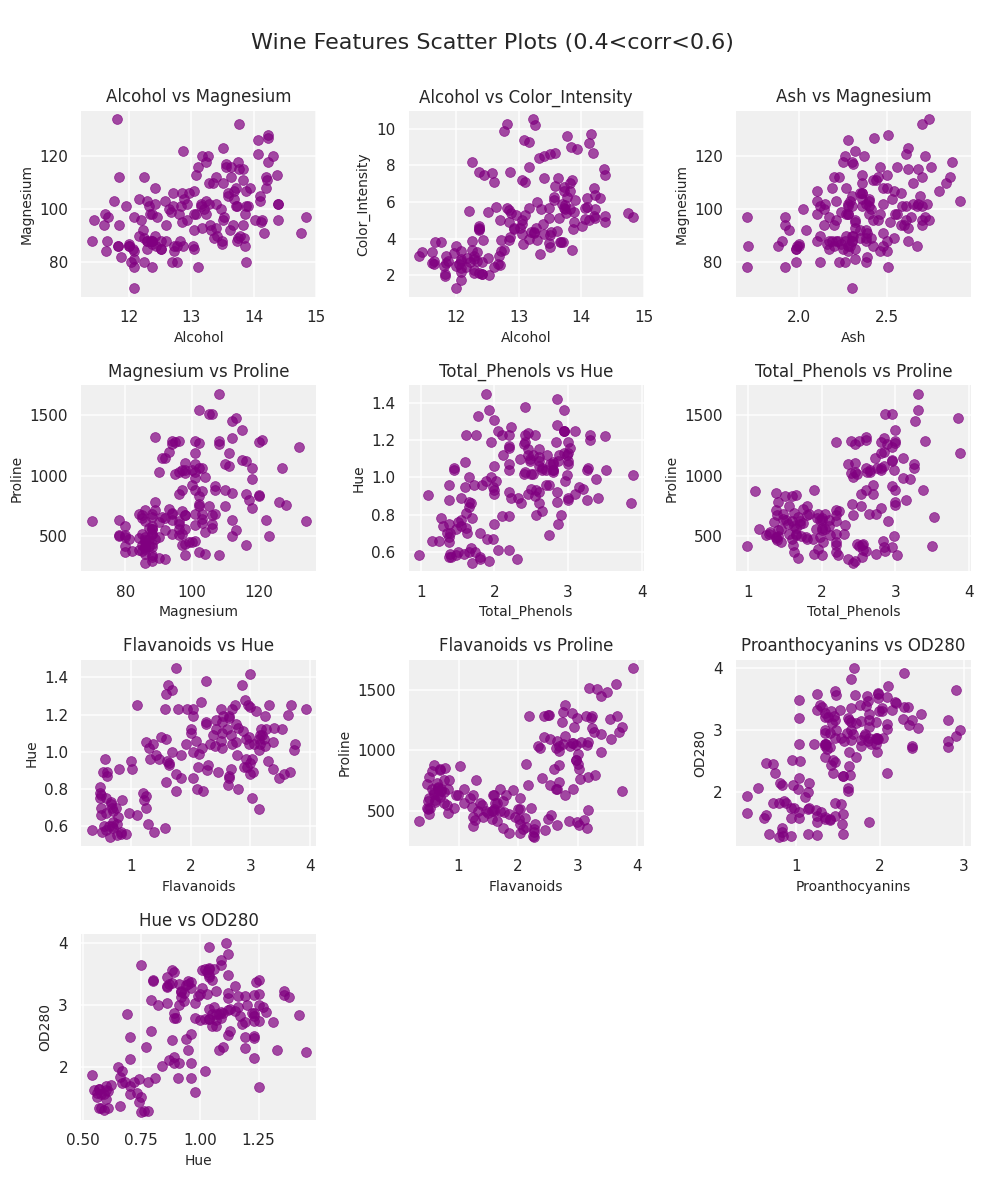

In [394]:
plot_correlated_scatters(wine_cleaned,0.4,0.6)

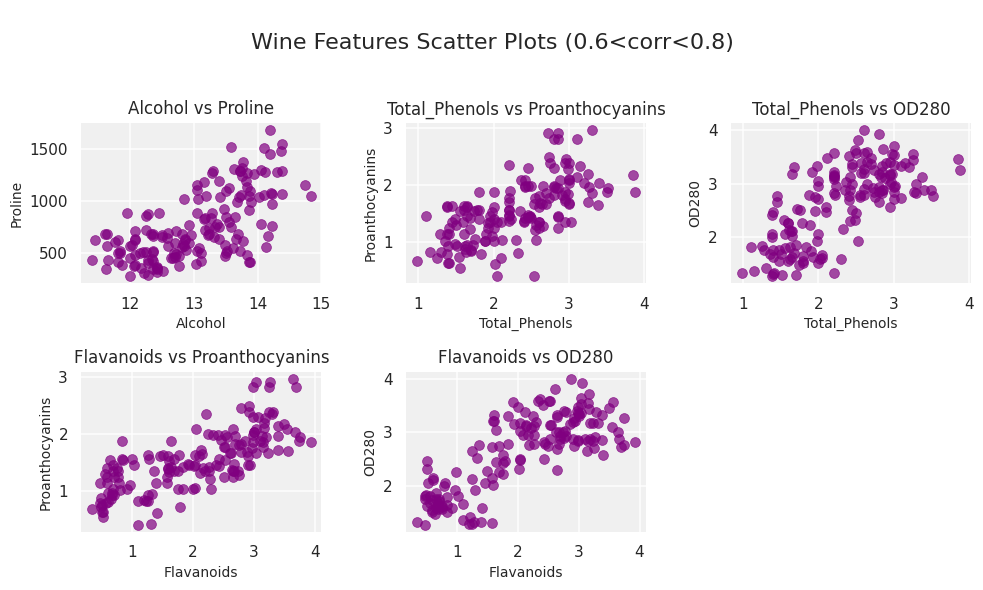

In [395]:
plot_correlated_scatters(wine_cleaned,0.6,0.8)

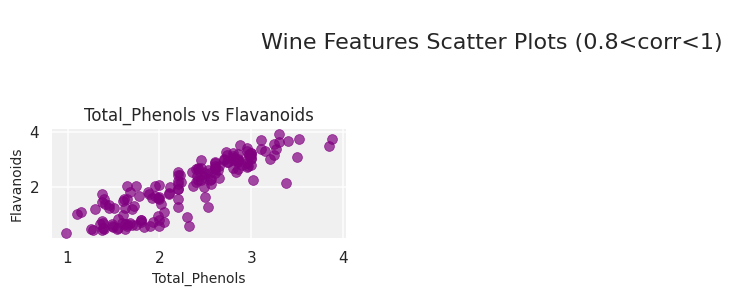

In [396]:
plot_correlated_scatters(wine_cleaned,0.8,1)

Total phenols and flavanoids are highly correlated, we could drop total_phenols

In [224]:
def drop_correlated_features(df_cleaned, threshold=0.8):
    """
    Clean Df by removing columns highly correlated. Calculates correlation
    matrix and features highly correlated (correlation>threshold), and then
    drops one of the features in high correlated features pairs.

    Parameters:
    - df_cleaned(pd.DataFrame): Input DataFrame
    - threshold(float<1): threshold for correlation

    Returns:
    - pd.DataFrame: DataFrame without highly correlated features

    """
    if threshold<1:
        df = df_cleaned.copy()
        correlation_matrix = df.corr()
        high_correlated = ((correlation_matrix > threshold) & (correlation_matrix < 1))

        # Use np.where to get the indices of True values in the boolean mask
        rows, columns = np.where(high_correlated)

        # Extract feature names from the indices and convert them to tuples
        feature_names = df_cleaned.columns
        correlated_features = [tuple(sorted([feature_names[rows[i]], feature_names[columns[i]]])) for i in range(len(rows))]
        #correlated pairs
        correlated_pairs = list(set(correlated_features))

        for pair in correlated_pairs:
            df.drop(columns=pair[0],inplace=True)
    else:
        print("Threshold has to be a value lower than 1")
        return None

    return df

In [225]:
wine_cleaned = drop_correlated_features(wine_cleaned)

## Clustering Analysis

Apply clustering techniques (e.g., K-Means, Hierarchical Clustering, DBSCAN) to group the wines based on their chemical properties. Determine the optimal number of clusters and justify your choice.

Analyze the characteristics of each cluster. What does each cluster represent in terms of wine properties?


### KMeans Scaled

In [194]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [373]:
def k_test(X):
    sns.set(rc={'font.family': 'sans-serif', 'font.sans-serif': ['DejaVu Sans']})
    k_tests = [2,3,4,5,6]
    wcss = []; silo = []
    random_state=42
    for k in k_tests:
        clustering = KMeans(k,random_state=random_state).fit(X)
        wcss.append(clustering.inertia_)
        silo.append(silhouette_score(X,clustering.predict(X)))



    plt.figure(figsize=(10,4))
    plt.suptitle("\nNumber of cluster decision throught Elbow Method and Siloutte Score", fontsize=14)

    plt.subplot(1,2,1);
    plt.title("Within-Cluster-Sum-of-Squares", fontsize=12)
    plt.scatter(k_tests, wcss, marker='o', edgecolor='k')
    plt.plot(k_tests, wcss, linestyle='--')
    plt.xlabel('Number of Clusters (k)', fontsize=10)
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=10)

    plt.subplot(1,2,2);
    plt.title("Silouette Width", fontsize=12)
    plt.scatter(k_tests, silo, marker='o', edgecolor='k')
    plt.plot(k_tests, silo, linestyle='--')
    plt.xlabel('Number of Clusters (k)', fontsize=10)
    plt.ylabel('Silouette Score)', fontsize=10)

    plt.tight_layout()

In [377]:
def plot_clusters(X,k,title=None,random_state=42,subplot=False,nrows=1,ncols=1,index=1):
    sns.set(rc={'font.family': 'sans-serif', 'font.sans-serif': ['DejaVu Sans']})

    cluster_assignments = KMeans(k, random_state=random_state).fit(X).predict(X)
    if subplot==False:
        plt.figure(figsize=(6,4))
    else:
        plt.subplot(nrows,ncols,index);
    plt.suptitle(title, fontsize=14)
    plt.title(f"KMeans Clustering (k={k})", fontsize=12)
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=cluster_assignments,s=25, edgecolor='k')
    plt.tight_layout()
    return cluster_assignments

In [378]:
X= wine_cleaned.copy()
X = StandardScaler().fit_transform(X)

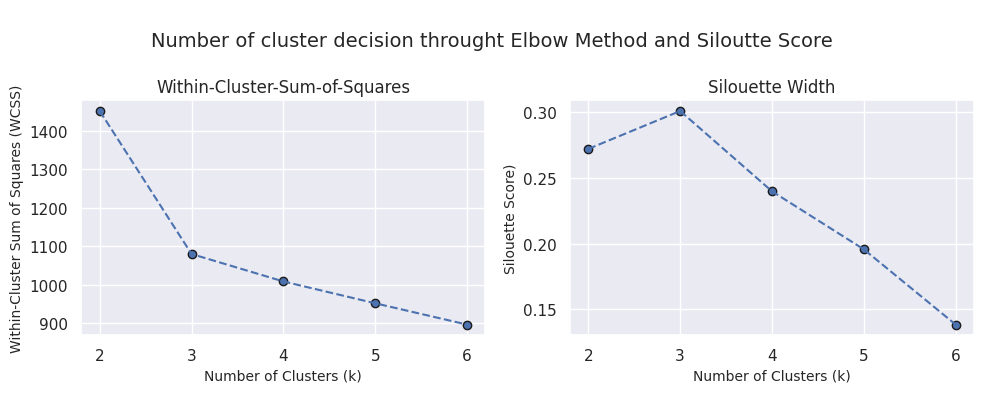

In [379]:
k_test(X)

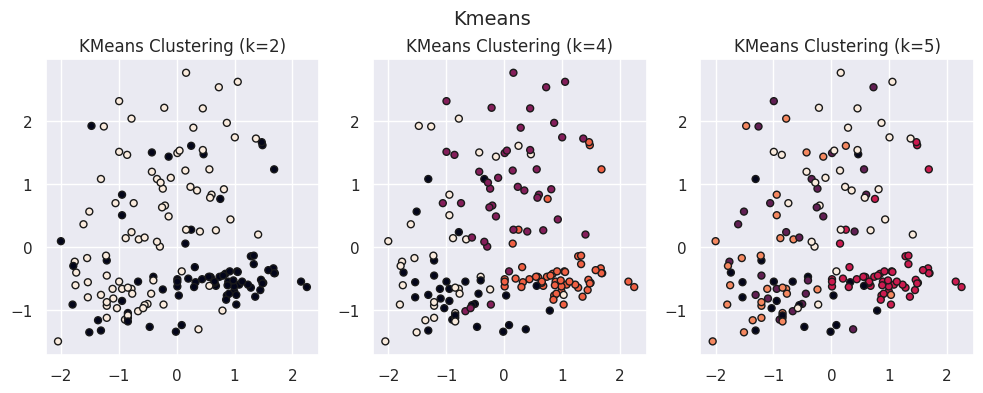

In [384]:
plt.figure(figsize=(10,4))

# -----Perform Kmeans clustering with k=3
plot_clusters(X,k=2, subplot=True,nrows=1,ncols=3,index=1)

# -----Perform Kmeans clustering with k=4
plot_clusters(X,k=4, subplot=True,nrows=1,ncols=3,index=2)

# -----Perform Kmeans clustering with k=5
plot_clusters(X,k=5, subplot=True,nrows=1,ncols=3,index=3)

plt.suptitle('Kmeans', fontsize=14);

### PCA (Scaled)

In [345]:
from sklearn.decomposition import PCA
import numpy as np

In [362]:
def plot_pca_n_decision(X_scaled):
    #selection the correct number of components
    pca = PCA()
    pca.fit(X_scaled)

    # Explained variance for each component
    explained_variance = pca.explained_variance_ratio_

    # Cumulative explained variance
    cumulative_variance = np.cumsum(explained_variance)

    # Plot explained variance
    plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
    plt.xlabel('Number of Components', fontsize=10)
    plt.ylabel('Cumulative Explained Variance', fontsize=10)
    plt.title('\nExplained Variance vs. Number of Components\n', fontsize=14)
    plt.show()


In [363]:
X=wine_cleaned.copy()
X=StandardScaler().fit_transform(X)

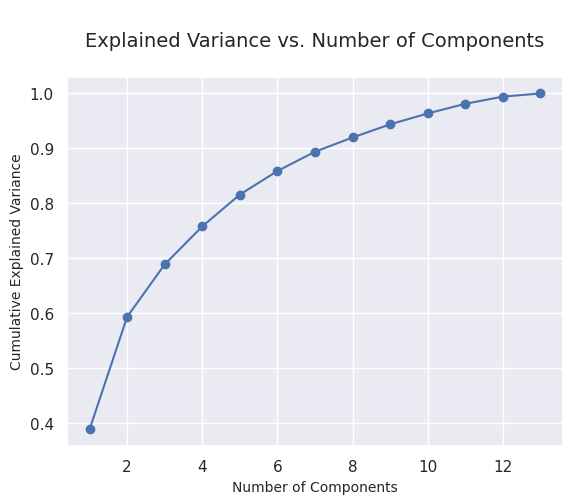

In [364]:
plot_pca_n_decision(X)

In [349]:
pca = PCA(n_components=3).fit(X)
X_transformed=pca.transform(X)

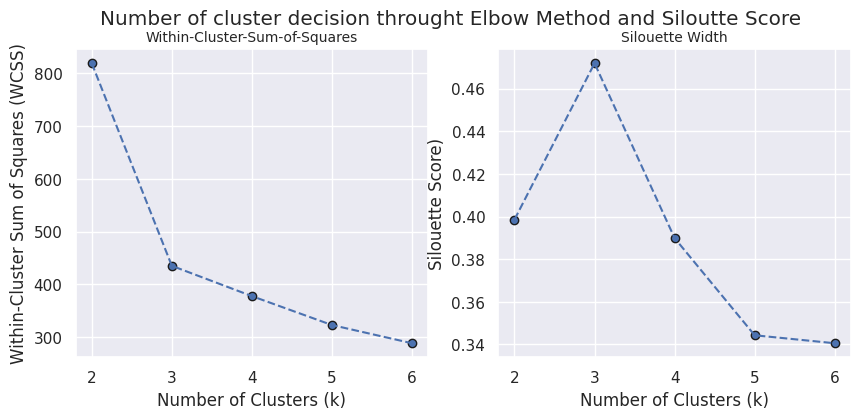

In [335]:
k_test(X_transformed)

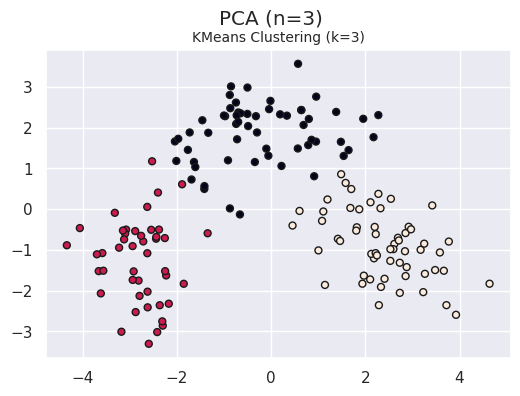

In [336]:
random_state=42
n=3
# -----Perform PCA with n components and k clusters
k=3
pca =PCA(n_components=n).fit(X)
X_transformed=pca.transform(X)

cluster_assignments=plot_clusters(X_transformed,k=3, title='PCA (n=3)')


In [207]:
# Biplot function
def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]

    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())

    plt.scatter(xs * scalex, ys * scaley, c=cluster_assignments, marker='o')

    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var" + str(i + 1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

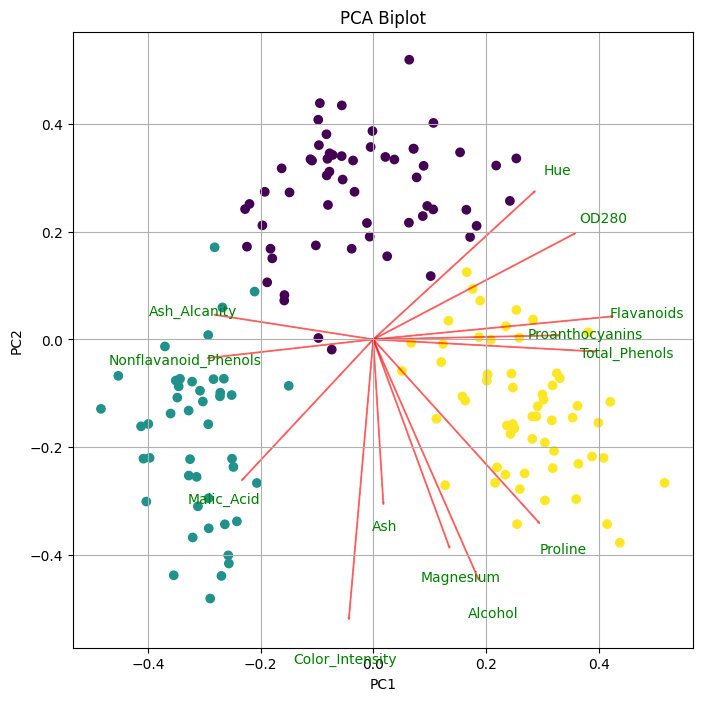

In [208]:
plt.figure(figsize=(8, 8))
biplot(X_transformed, np.transpose(pca.components_), labels=wine_cleaned.columns)
plt.title("PCA Biplot")
plt.show()


**OBSERVATIONS:**

- Alkalinity of Ash, Nonflavanoid phenols and Malic acid tends to form one of the clusters.
- Color Intensity, Ash, Alcohol, Magnesium and Proline tends to form another cluster.
- Hue, Diluted wines, Flavanoids and Proanthocyanins tends to form yet another cluster.

## Creative Insights and Storytelling
Beyond the technical analysis, craft a narrative around your findings. 

What interesting stories do the data tell about the wines?

Are there any unexpected correlations or findings that could be of interest to wine makers or enthusiasts?
